## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_df[mouse_df.duplicated(['Mouse ID', 'Timepoint'])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = mouse_df.loc[mouse_df["Mouse ID"] == 'g989', :  ]


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_df.loc[mouse_df['Mouse ID'] != 'g989']
clean_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


test_group = clean_df.groupby(["Drug Regimen"])

mean = test_group['Tumor Volume (mm3)'].mean()
median = test_group['Tumor Volume (mm3)'].median()
variance = test_group['Tumor Volume (mm3)'].var()
sd = test_group['Tumor Volume (mm3)'].std()
sem = test_group['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({'Mean Tumor Volume': mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Standard Deviation": sd, "Tumor Volume SEM": sem}).round(2)

summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
test_group["Tumor Volume (mm3)"].agg(['mean','median', 'var', 'std', 'sem']).round(2)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [9]:
test_group.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


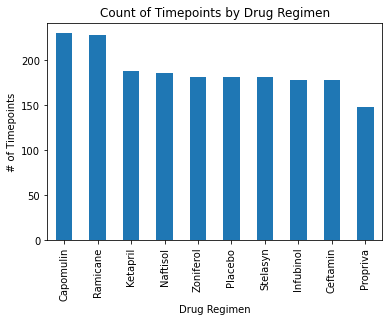

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_count = clean_df['Drug Regimen'].value_counts()

drug_count.plot(kind = 'bar', ylabel = '# of Timepoints', xlabel = 'Drug Regimen', title = 'Count of Timepoints by Drug Regimen')

#test_group['Timepoint'].count().plot(kind='bar', ylabel = "# of Timepoints", title = "Count of Timepoints by Drug Regimen")
plt.show()

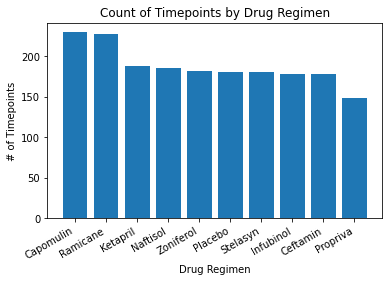

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

counts = clean_df['Drug Regimen'].value_counts()

plt.bar(counts.index, counts)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Timepoints")
plt.title("Count of Timepoints by Drug Regimen")


plt.gcf().autofmt_xdate()
plt.show()

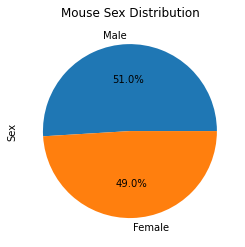

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_df['Sex'].value_counts()

sex_count.plot(kind = 'pie', autopct = "%1.1f%%", title ='Mouse Sex Distribution')

plt.show()

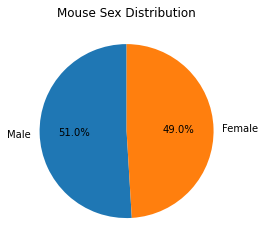

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_df['Sex'].value_counts()

plt.pie(sex_count, labels = sex_count.index, autopct = "%1.1f%%", startangle=90)
plt.title('Mouse Sex Distribution')

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tum_vol = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
final_tum_vol = final_tum_vol.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tum_df = final_tum_vol.merge(clean_df,on=['Mouse ID','Timepoint'],how="left")

In [26]:
final_tum_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []
max_drugs = []

for drug in treatments:
    
    final_tumor_vol = final_tum_df.loc[final_tum_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    #drug_regimen = final_tum_df.loc[['Drug Regimen'] == drug, 'Drug Regimen']
        
    tumor_vol.append(final_tumor_vol)
    #max_drugs.append(drug_regimen)
    
    #print(final_tumor_vol)
    #print(max_drugs)

In [17]:
tumor_vol

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [18]:
max_tumor_df = pd.DataFrame({treatments[0]: tumor_vol[0],
                            treatments[1]: tumor_vol[1],
                            treatments[2]: tumor_vol[2],
                            treatments[3]: tumor_vol[3]})

max_tumor_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,NaN,NaN,67.973419,NaN
1,NaN,NaN,65.525743,NaN
3,NaN,NaN,NaN,62.999356
6,NaN,38.407618,NaN,NaN
7,NaN,43.047543,NaN,NaN
...,...,...,...,...
238,NaN,NaN,NaN,68.594745
239,31.896238,NaN,NaN,NaN
240,NaN,NaN,NaN,64.729837
244,NaN,30.638696,NaN,NaN


In [19]:
quartiles = max_tumor_df.quantile([0.25, 0.5, 0.75]).round(2)
quartiles

,Capomulin,Ramicane,Infubinol,Ceftamin
0.25,32.38,31.56,54.05,48.72
0.50,38.13,36.56,60.17,59.85
0.75,40.16,40.66,65.53,64.30


In [20]:
quartiles['Capomulin']

0.25    32.38
0.50    38.13
0.75    40.16
Name: Capomulin, dtype: float64

In [51]:
  # Determine outliers using upper and lower bounds

iqr_list = []
outliers = []
lower_bound_list = []
upper_bound_list = []
    
for i in range(0, len(treatments)):
    
    quartiles = tumor_vol[i].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    iqr_list.append(iqr)
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
      
    lower_bound_list.append(lower_bound)
    upper_bound_list.append(upper_bound)
    
    
    
#     for j in range(0, len(tumor_vol)):
#         if tumor_vol[i][j] >= upper_bound_list[i]:
#             outliers.append(tumor_vol)
    
    
    print(f'For {treatments[i]} the lower bound is {lower_bound.round(2)} and the upper bound is {upper_bound.round(2)}.')

#print(outliers)
#len(tumor_vol[i])

For Capomulin the lower bound is 20.7 and the upper bound is 51.83.
For Ramicane the lower bound is 17.91 and the upper bound is 54.31.
For Infubinol the lower bound is 36.83 and the upper bound is 82.74.
For Ceftamin the lower bound is 25.36 and the upper bound is 87.67.


In [58]:
#this will work in a pinch

#other approach is
# 1) create df with drug, lower bound, upper bound
# 2) trim original df to include drug and tumor value
# 3) search using the criteria in 1) to find if tumor values are outliers

inf = max_tumor_df.loc[max_tumor_df['Infubinol'] <= lower_bound_list[2]]

inf_outlier

,Capomulin,Ramicane,Infubinol,Ceftamin
31,NaN,NaN,36.321346,NaN


In [56]:
lower_bound

25.355449580000002

In [49]:
tumor_vol[0][19]

38.98287774

In [53]:
lower_bound_list

[20.70456164999999, 17.912664470000003, 36.83290494999999, 25.355449580000002]

In [ ]:
treatments

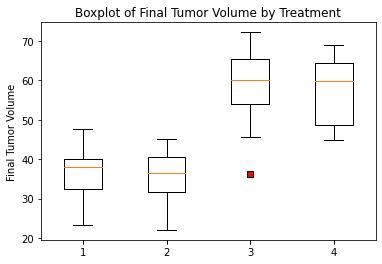

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of Final Tumor Volume by Treatment')
ax1.set_ylabel('Final Tumor Volume')

tick_locations = []
for x in range(1, 5):
    tick_locations.append(x)
    
plt.xticks(tick_locations, treatments)

red_square = dict(markerfacecolor='r', marker='s')
ax1.boxplot(tumor_vol, flierprops=red_square)
plt.show()

In [ ]:
tick_locations

In [ ]:
treatments

## Line and Scatter Plots

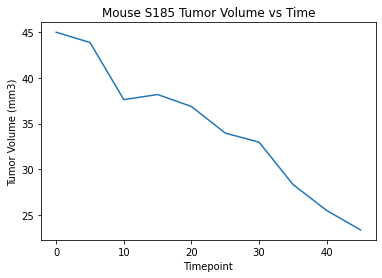

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#s185

s185 = clean_df.loc[clean_df['Mouse ID'] == 's185']

plt.plot(s185['Timepoint'], s185['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Mouse S185 Tumor Volume vs Time')

plt.show()



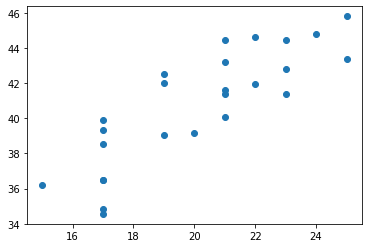

In [60]:
#need axis labels

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse_group = capomulin.groupby(['Mouse ID'])

y_axis = mouse_group['Tumor Volume (mm3)'].mean()
x_axis = mouse_group['Weight (g)'].mean()

plt.scatter(x_axis, y_axis)
plt.ylabel = ('Average Tumor Volume (mm3)')
plt.xlabel = ('Weight (g)')
plt.title = ('Average Tumor Volume (mm3) vs Mouse Weight')


plt.show()



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = round(st.pearsonr(x_axis, y_axis)[0], 2)
print(f' The correlation coefficient between mouse weight and tumor volume is {corr}')


In [ ]:
#linear regression

#need lables n such

slope, int, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
line = slope * x_axis + int
line_eq = 'y=' + str(round(slope, 2)) + 'x + ' + str(round(int, 2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,line,'r')
plt.annotate(line_eq,(20, 36), fontsize = 15, color = 'red')



